In [1]:
# importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# load iris dataset
iris=datasets.load_iris()

In [3]:
# convert dataset into a pandas dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

In [4]:
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   s_length  150 non-null    float64 
 1   s_width   150 non-null    float64 
 2   p_length  150 non-null    float64 
 3   p_width   150 non-null    float64 
 4   target    150 non-null    float64 
 5   species   150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.3 KB


In [10]:
df.describe()

,s_length,s_width,p_length,p_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.corr()

,s_length,s_width,p_length,p_width,target
s_length,1.000000,-0.117570,0.871754,0.817941,0.782561
s_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
p_length,0.871754,-0.428440,1.000000,0.962865,0.949035
p_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


C:\Users\kartik\OneDrive\Documents\anaconda k\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\OneDrive\Documents\anaconda k\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kartik\OneDrive\Documents\anaconda k\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


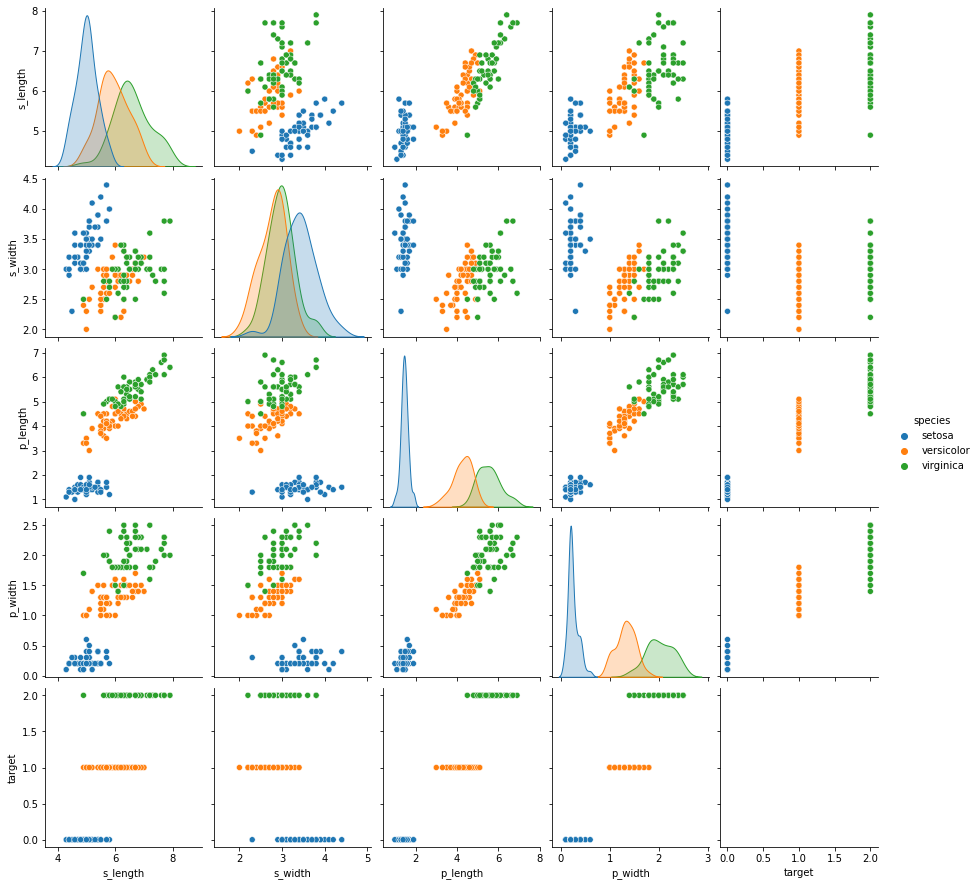

In [7]:
import seaborn as sns
sns.pairplot(df,hue='species')

**Observation:**
Here the independent variables are s_length,s_width,p_length,p_width and the dependent variable is species

In [5]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Observation:**
Build a linear discriminant analysis model to classify which species a given flower belongs to
and  use them to predict the response variable Species, which takes on the following three potential classes:
setosa
versicolor
virginica

In [6]:
# evaluating the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9777777777777779


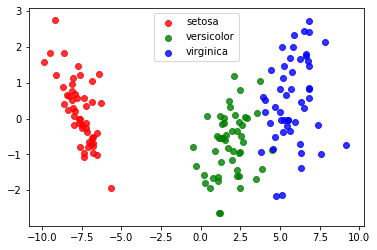

In [7]:
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

**Observation:**
We can clearly see that the three classes are seperated and can be distinguished easily.

In [8]:
# define new observation
new = [5, 2, 1, .4]

# predict which class the new observation belongs to
model.predict([new])

array([0])

**Observation:**
The model predicts this new observation to belong to the species called setosa.